In [1]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()

Długość skrzydła P (cm) female: mean=31.46, std=0.63, cv=0.02
Długość skrzydła P (cm) male: mean=32.73, std=0.86, cv=0.03
Mann-Whitney 'u' Długość skrzydła P (cm) by gender: pvalue=0.01
Saving plot to 'images/Długość skrzydła P (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość skrzydła P (cm)'>

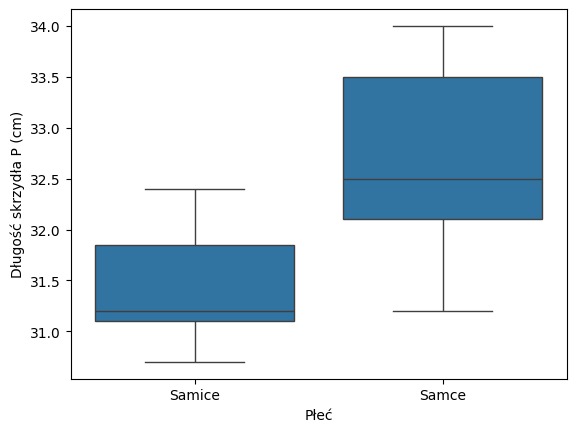

In [2]:
ds.compare_by_gender(x="Długość skrzydła P (cm)")

Saving plot to 'images/All corelations both genders.png'


<Axes: >

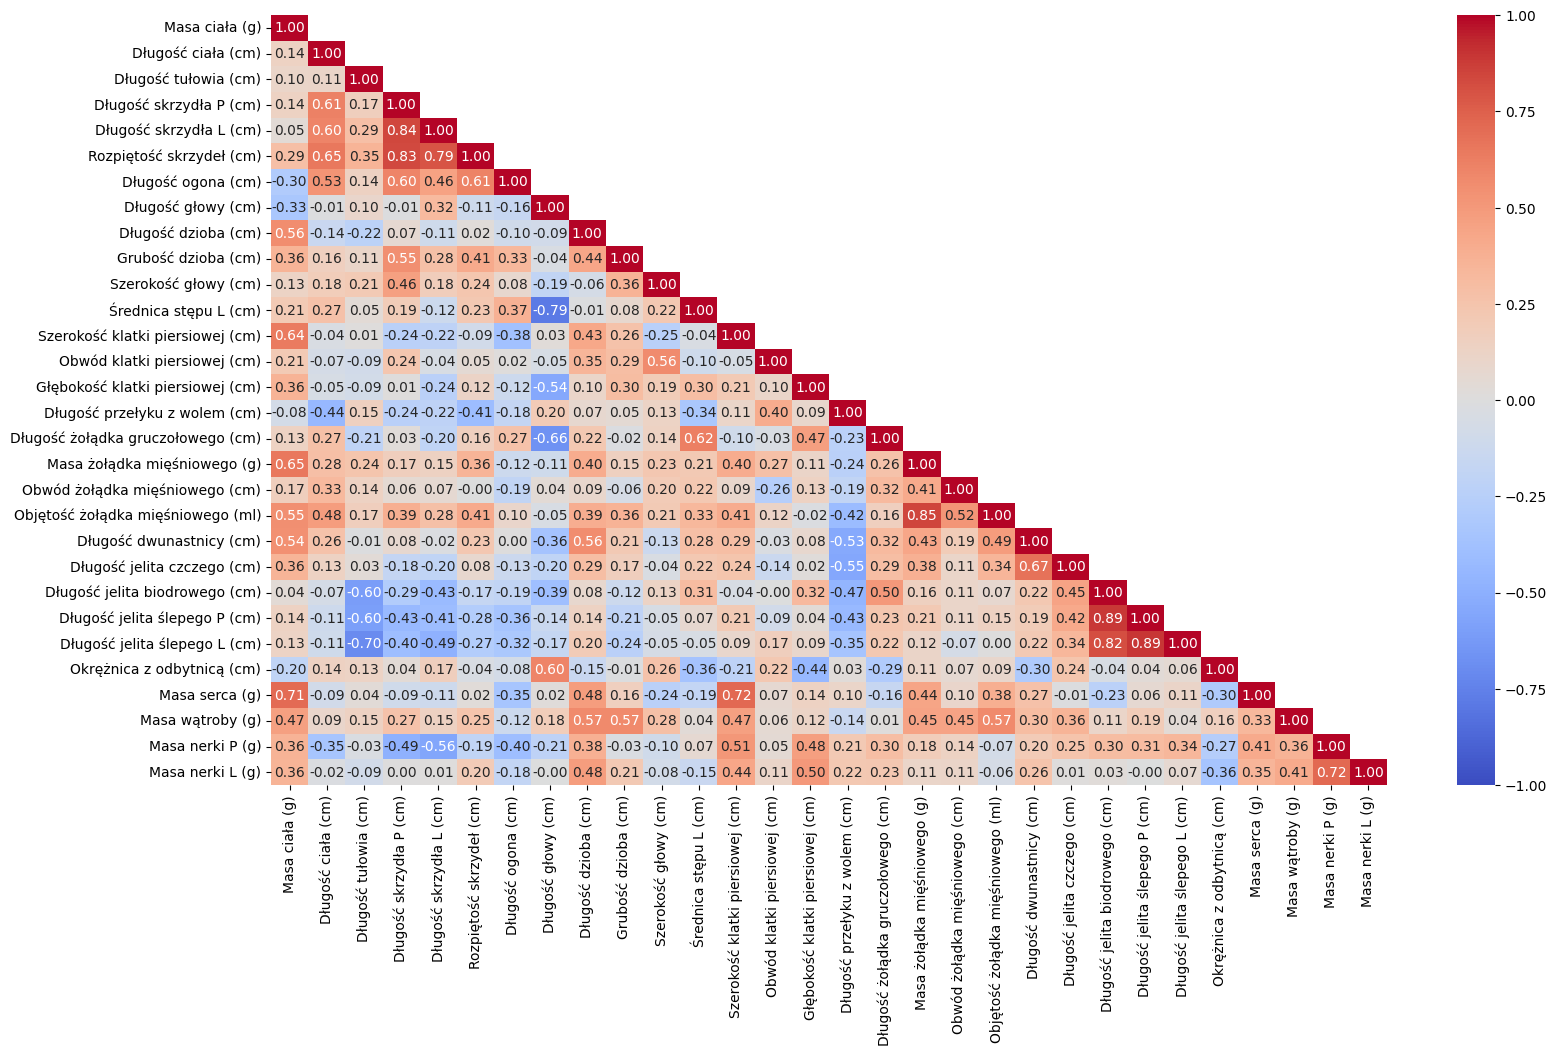

In [3]:
ds.corr_heatmap(ds.data_cols, ds.data_cols,"All corelations both genders")

Saving plot to 'images/All corelations Samice.png'


<Axes: >

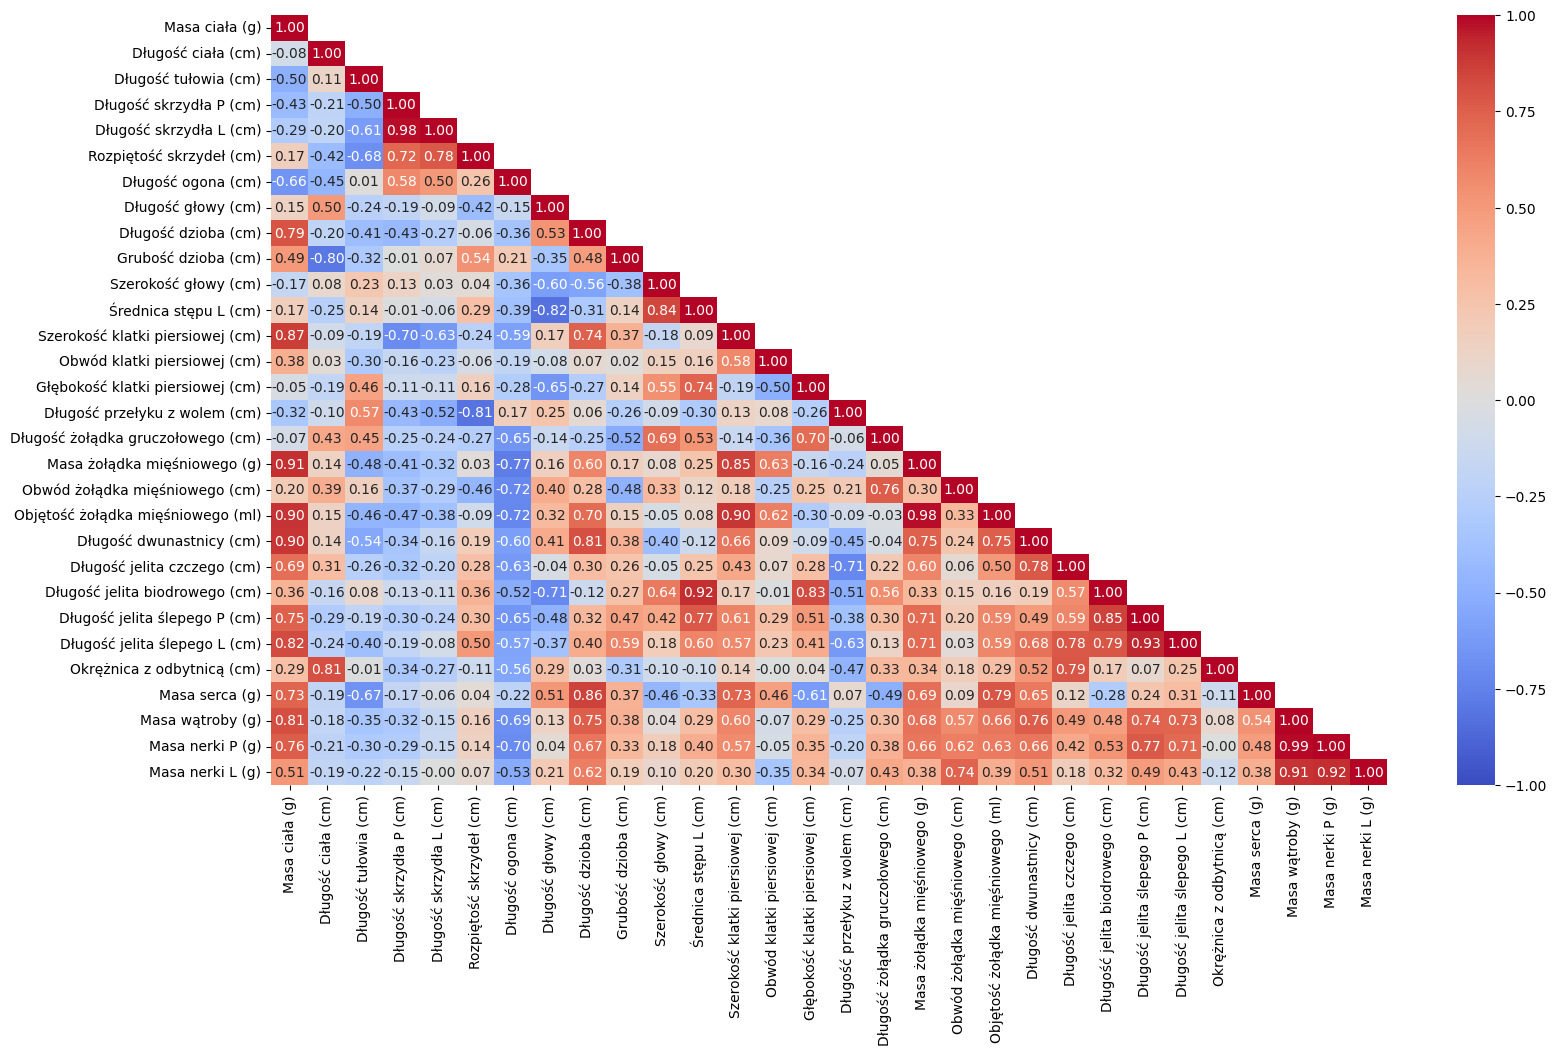

In [4]:
ds.corr_heatmap(ds.df["Płeć"] == "Samice", ds.data_cols,"All corelations Samice")

Saving plot to 'images/All corelations Samce.png'


<Axes: >

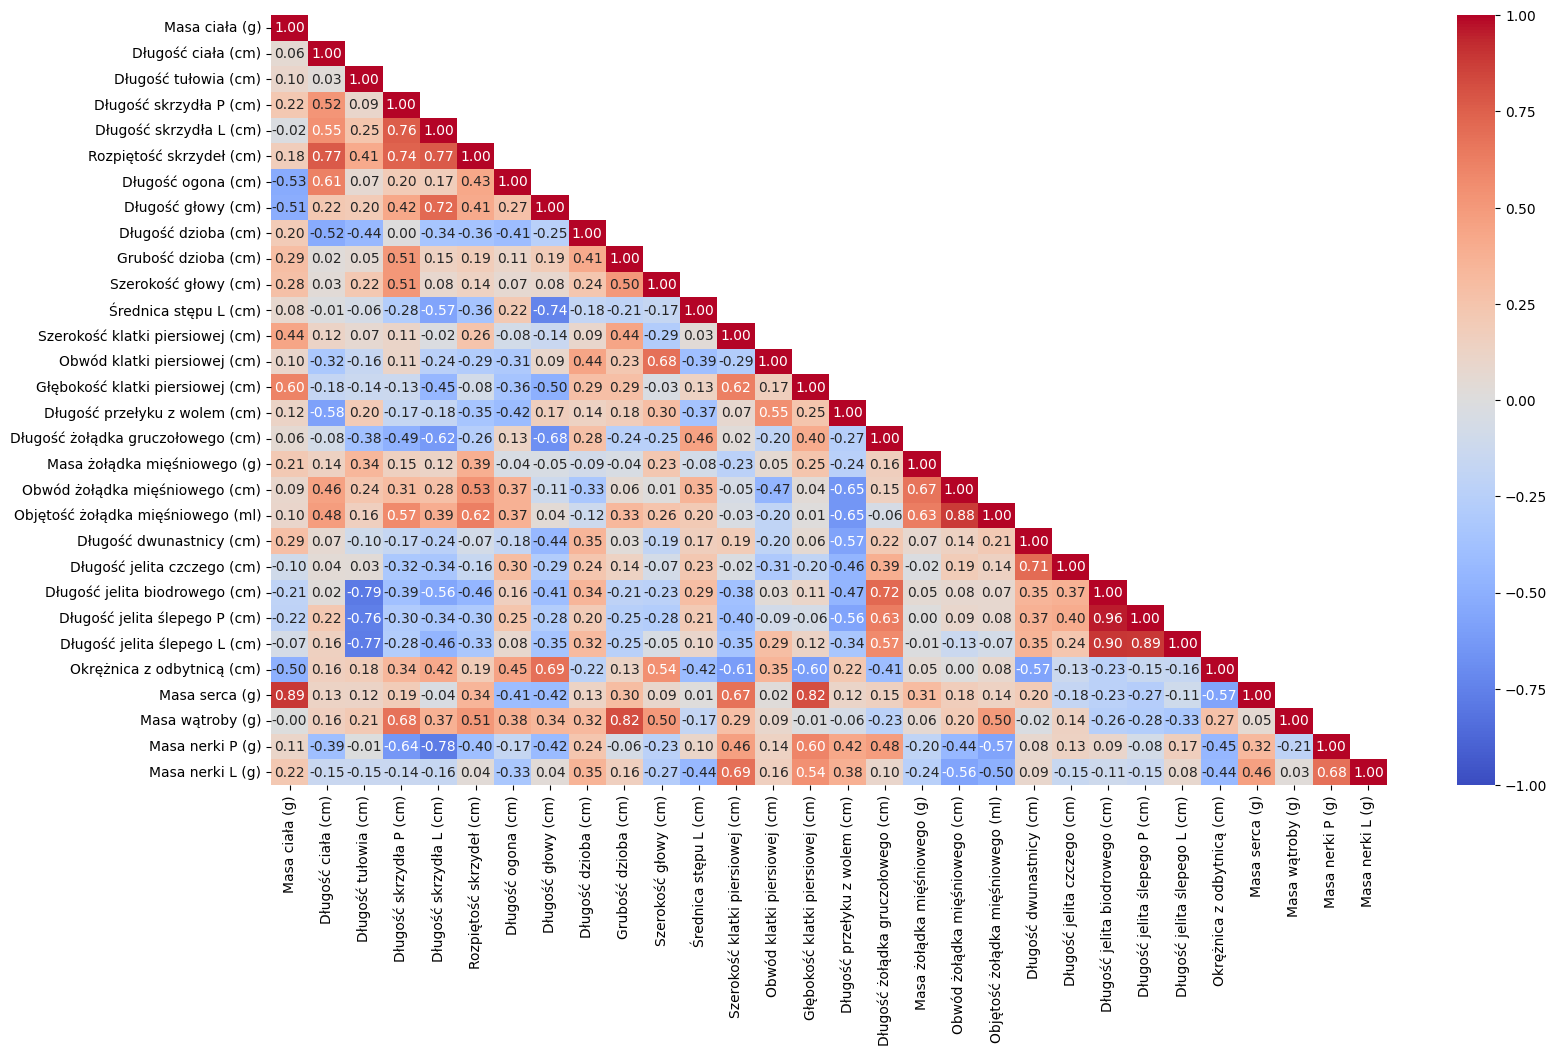

In [5]:
ds.corr_heatmap(ds.df["Płeć"] == "Samce", ds.data_cols,"All corelations Samce")

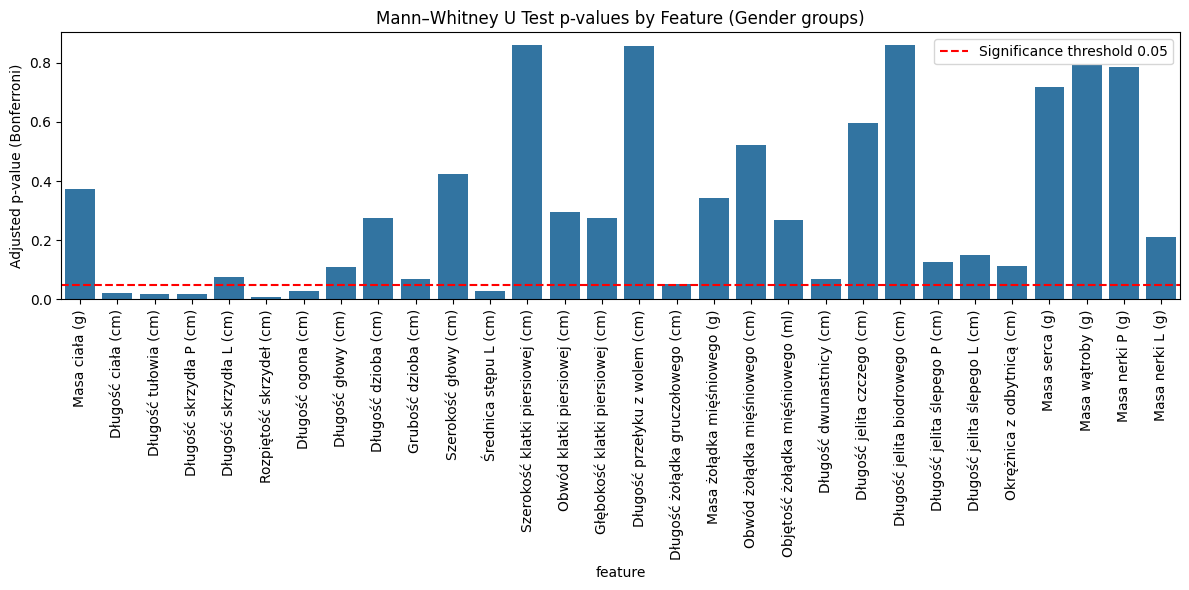

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro
import numpy as np

# Assuming df: rows=samples, columns=features
# gender: Series aligned with df.index, values 'male'/'female'

pvals = []
normality1 = []
normality2 = []
features = []
df = ds.df.dropna()
for col in ds.data_cols:
    group1 = df[df["Płeć"] == "Samice"][col]
    group2 = df[df["Płeć"] == "Samce"][col]

    if len(group1) > 0 and len(group2) > 0:
        _, p = mannwhitneyu(group1, group2, alternative="two-sided")
    else:
        p = None
    if isinstance(p, list):
        p = p[0]
    normality1.append(shapiro(group1).pvalue)
    normality2.append(shapiro(group2).pvalue)

    pvals.append(p)
    features.append(col)

pvals_df = pd.DataFrame({"feature": features, "pvalue": pvals, "Shapiro F": normality1, "Shapiro M": normality2})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="feature", y="pvalue", data=pvals_df)
plt.xticks(rotation=90)
plt.ylabel("Adjusted p-value (Bonferroni)")
plt.title("Mann–Whitney U Test p-values by Feature (Gender groups)")
plt.axhline(0.05, color="red", linestyle="--", label="Significance threshold 0.05")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
pvals_df

,feature,pvalue,Shapiro F,Shapiro M
0,Masa ciała (g),0.374937,0.600938,8.657311e-01
1,Długość ciała (cm),0.023420,0.924601,7.371160e-02
2,Długość tułowia (cm),0.018114,0.757926,2.333825e-08
3,Długość skrzydła P (cm),0.018114,0.401606,8.379476e-01
4,Długość skrzydła L (cm),0.075859,0.370949,3.524429e-01
5,Rozpiętość skrzydeł (cm),0.009546,0.824742,4.008580e-01
6,Długość ogona (cm),0.029399,0.389195,5.544877e-01
7,Długość głowy (cm),0.108325,0.213070,3.114889e-01
8,Długość dzioba (cm),0.276877,0.752652,3.541354e-01
9,Grubość dzioba (cm),0.069945,0.851753,2.961859e-01


In [8]:
pvals_df.to_excel("pvals.xlsx")